# Continuum Limit

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("../figures/paper.mplstyle")

## Import data for the energy

In [2]:
data = pd.read_csv('../../lattice/improv_runs/bmn2_su3_g10/e.csv')

In [3]:
data.head()

,T,L,E,err,meas,freq,tau
0,0.40,16,8.0840,0.0493,1980,50,0.93
1,0.35,16,7.9941,0.0447,1980,50,0.93
2,0.30,16,7.8796,0.0413,1980,50,0.85
3,0.25,16,7.6076,0.0372,1980,50,0.92
4,0.20,16,7.2906,0.0325,1980,50,0.98


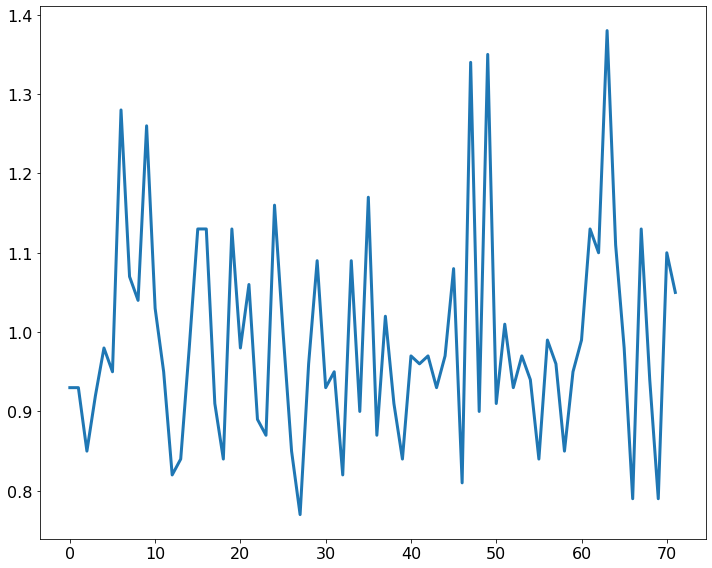

In [4]:
data["tau"].plot();

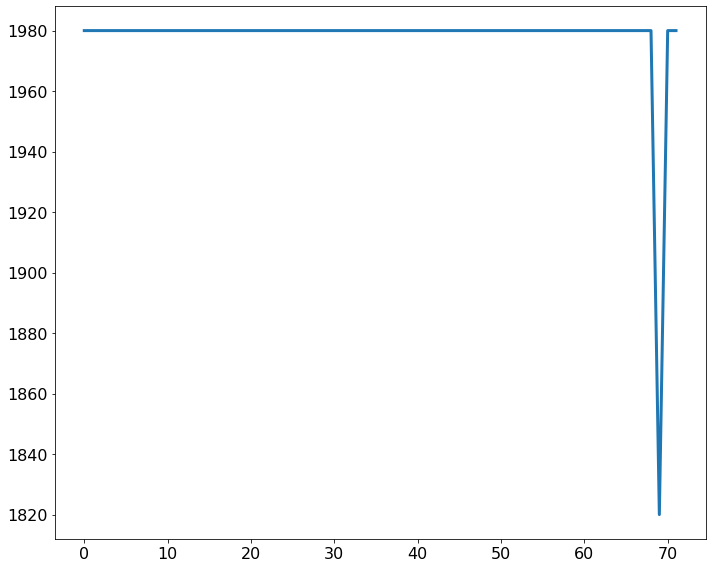

In [5]:
data["meas"].plot();

### Create 1/L feature

In [6]:
data["1/L"]= 1./data["L"]

### Create 1/T feature

In [7]:
data["1/T"]= 1./data["T"]

### Create 1/(LT) feature

In [8]:
data["1/LT"]= 1./(data["T"]*data["L"])

## Plot for each temperature

In [9]:
temps = data.groupby("T")

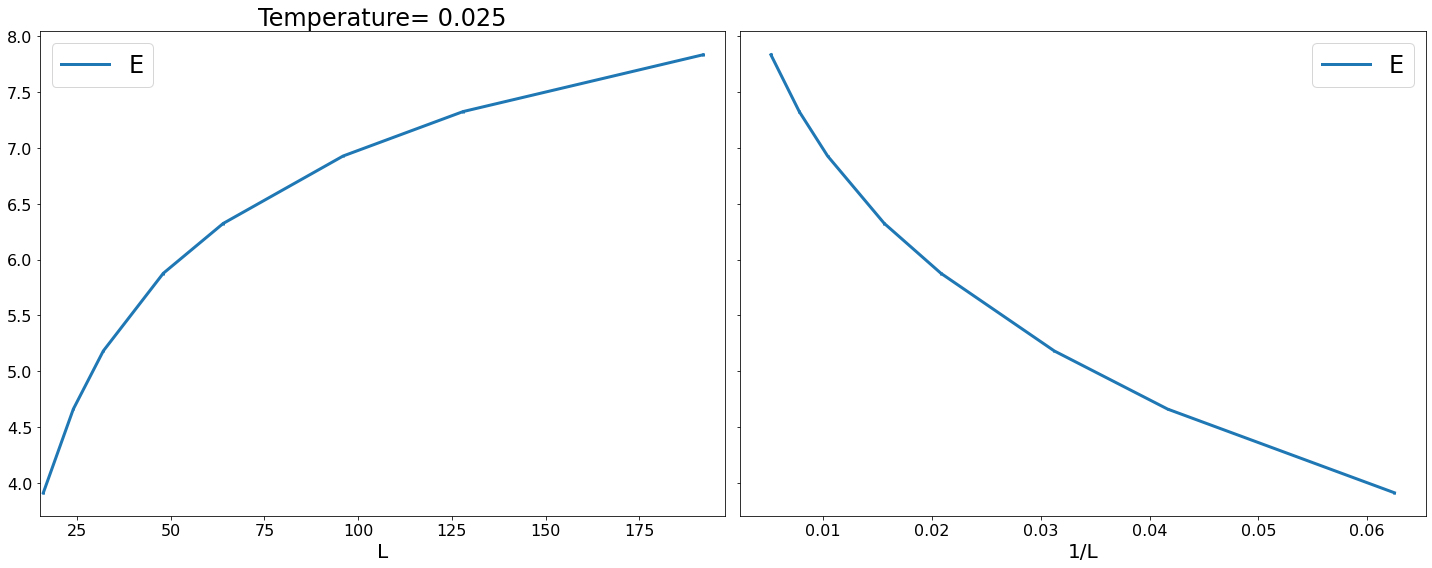

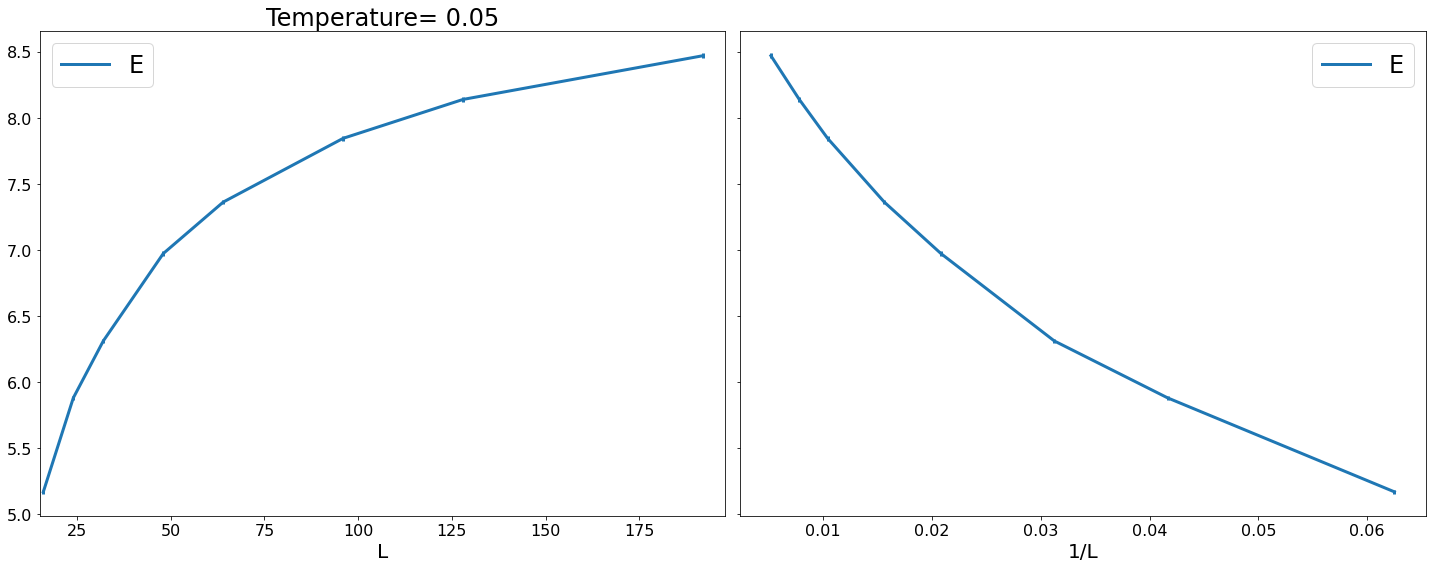

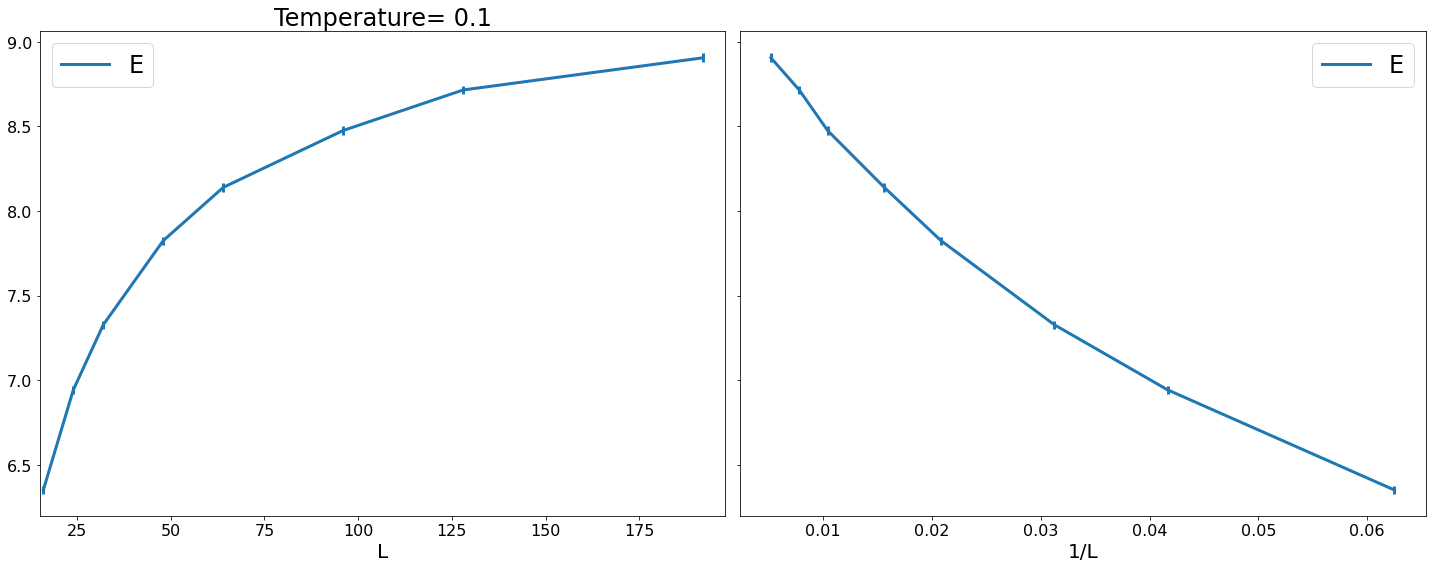

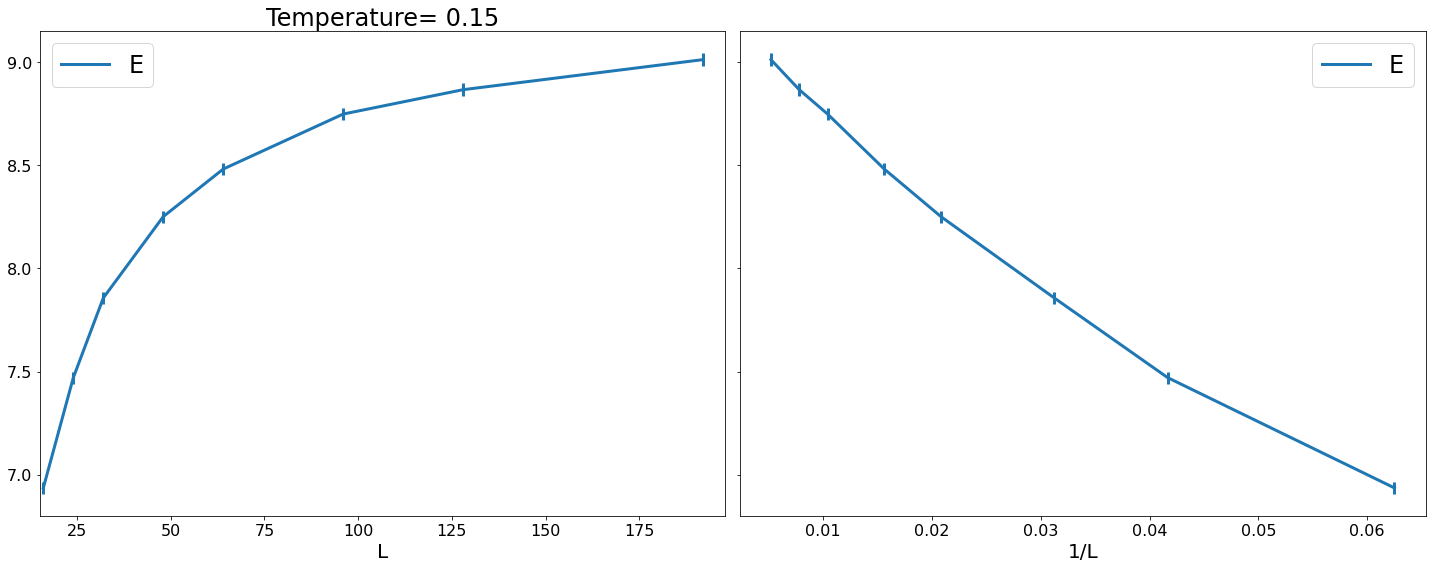

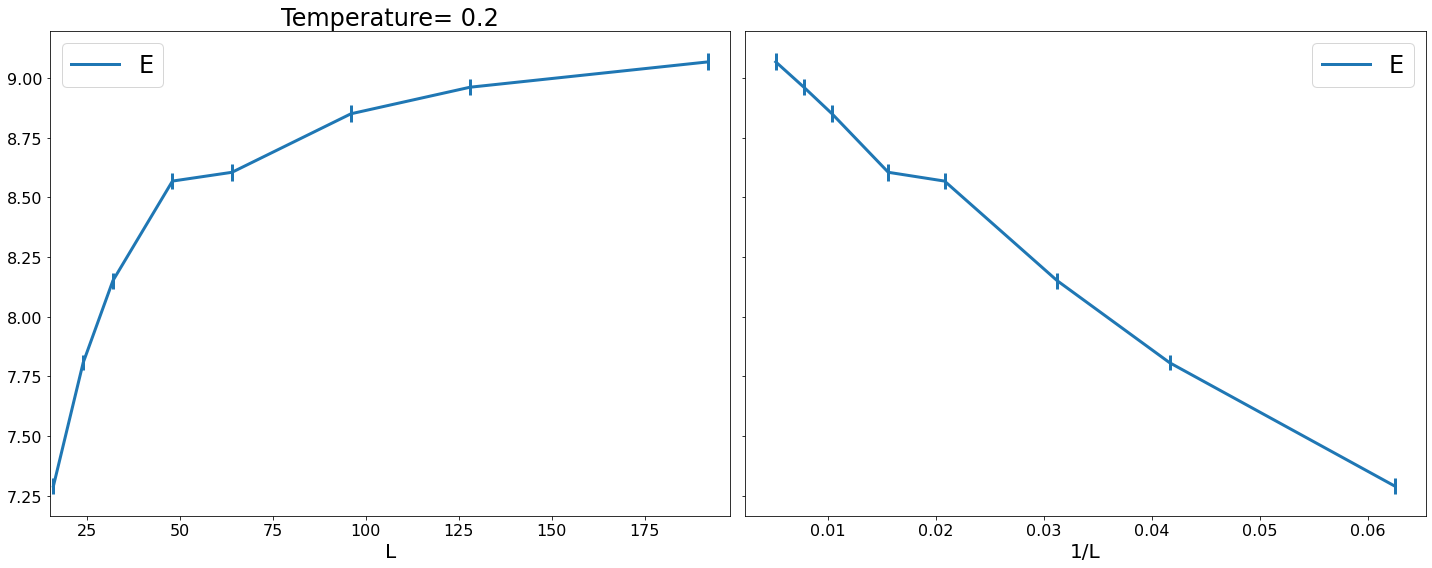

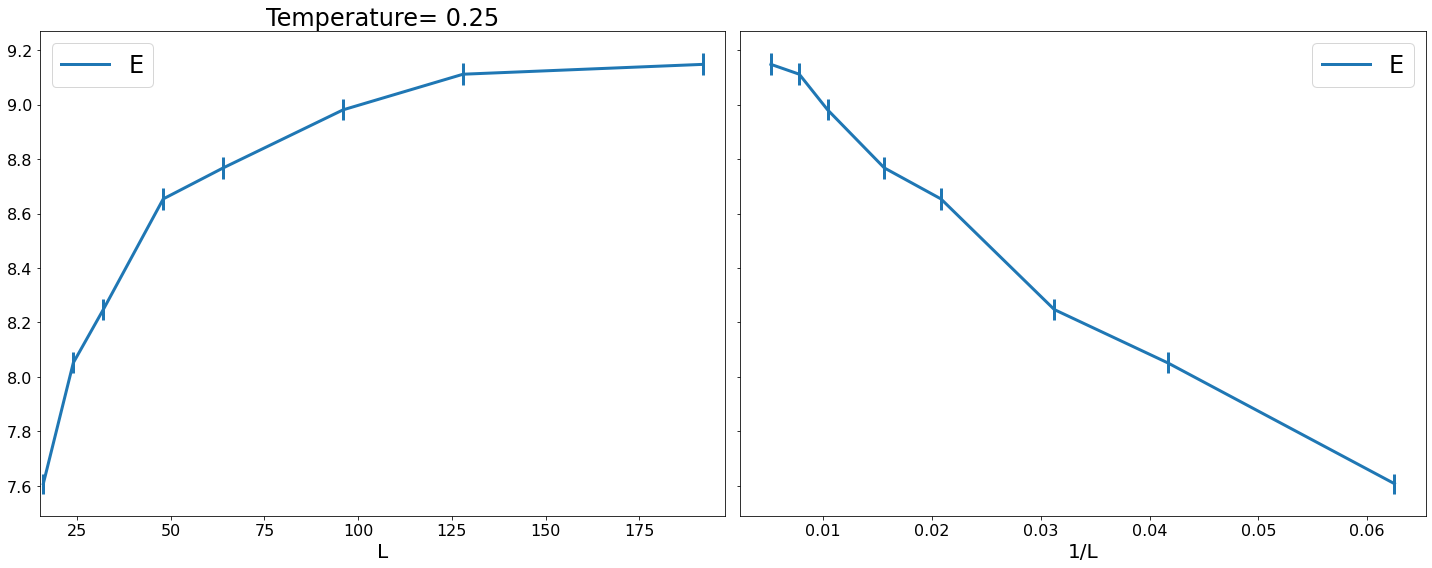

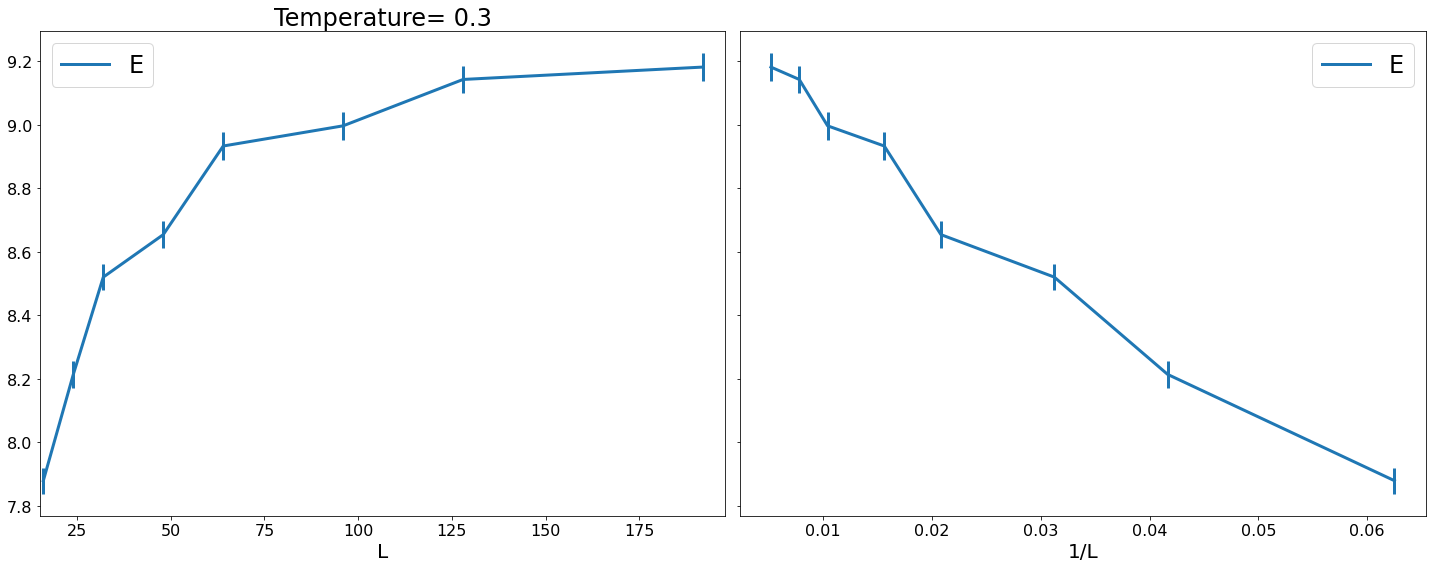

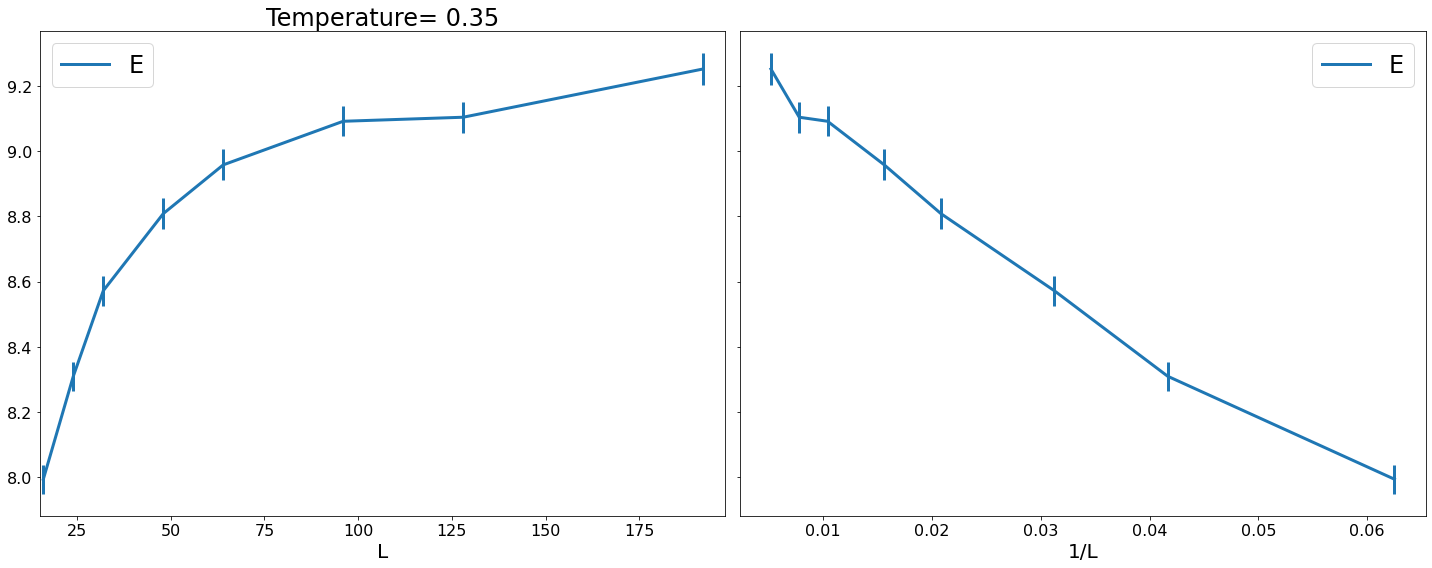

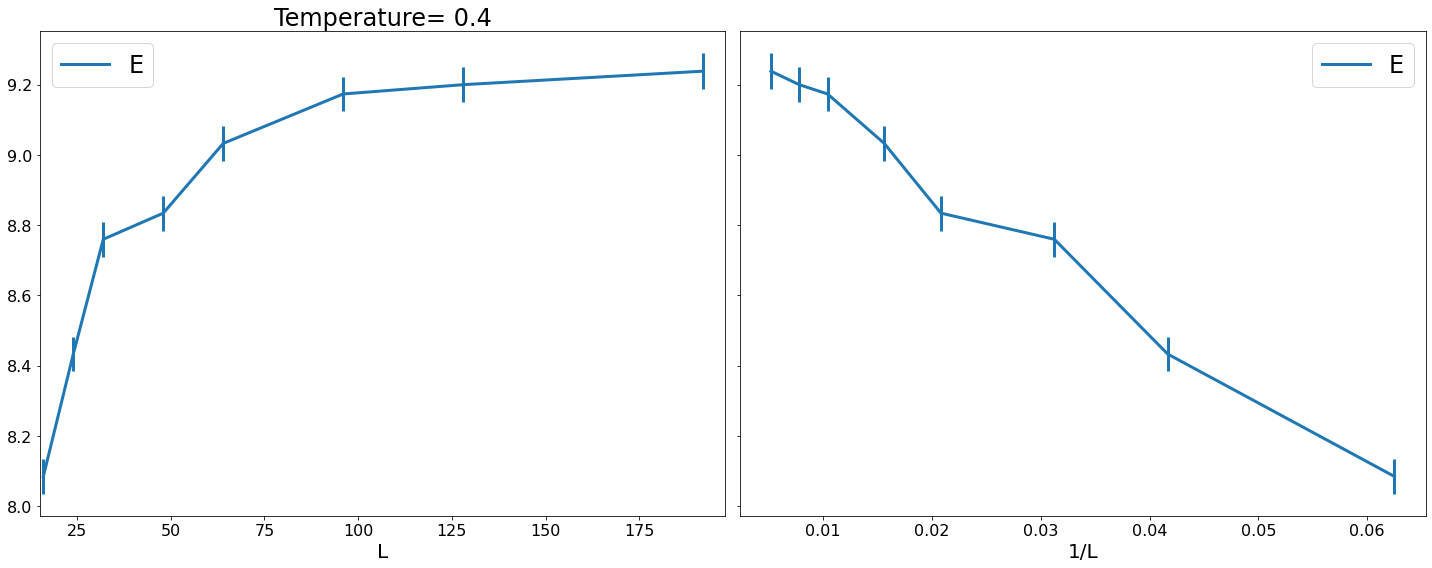

In [10]:
for g in temps.groups:
    df = temps.get_group(g)
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,8));
    df.plot(x="L", y="E", yerr="err", xlim=[15,198], ax=ax[0]);
    df.plot(x="1/L", y="E", yerr="err", ax=ax[1]);
    ax[0].set_title(f"Temperature= {g}");

## Plot for each size

In [11]:
sizes = data.groupby("L")

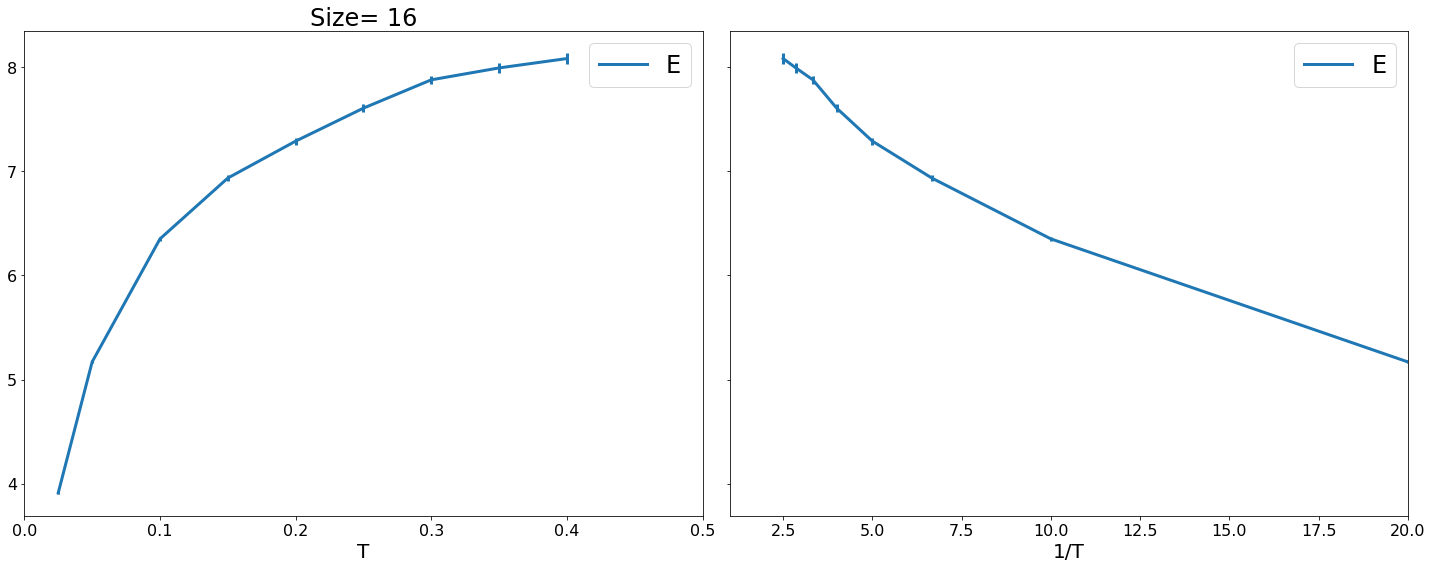

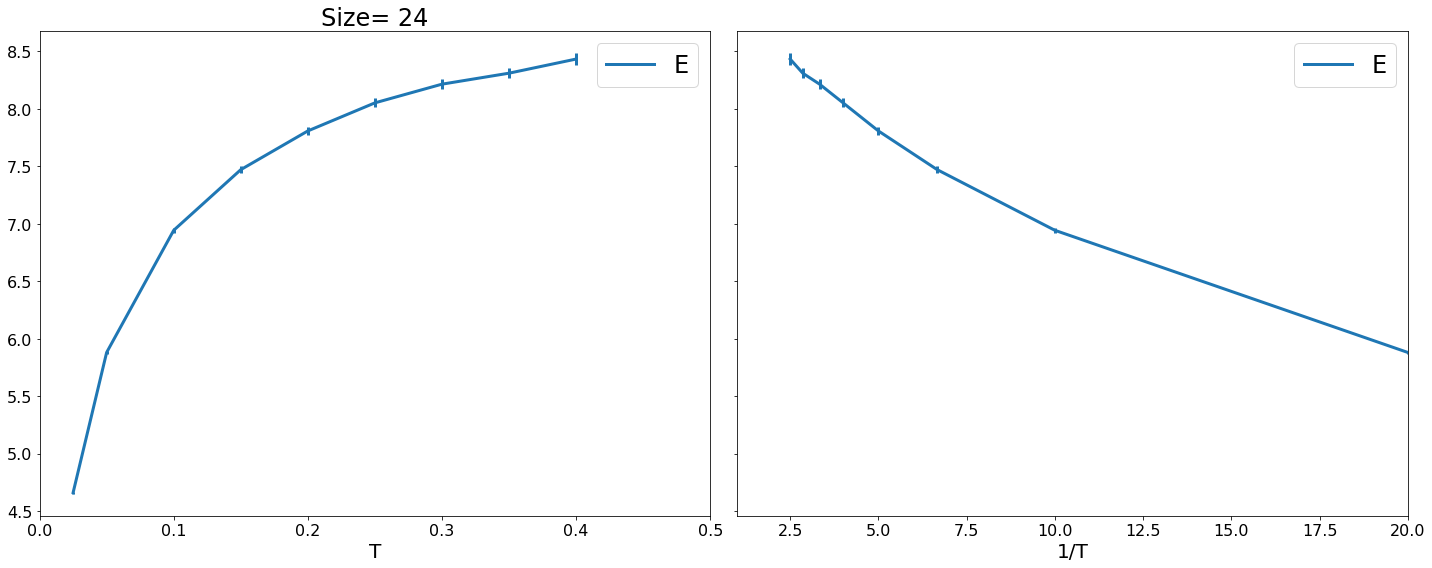

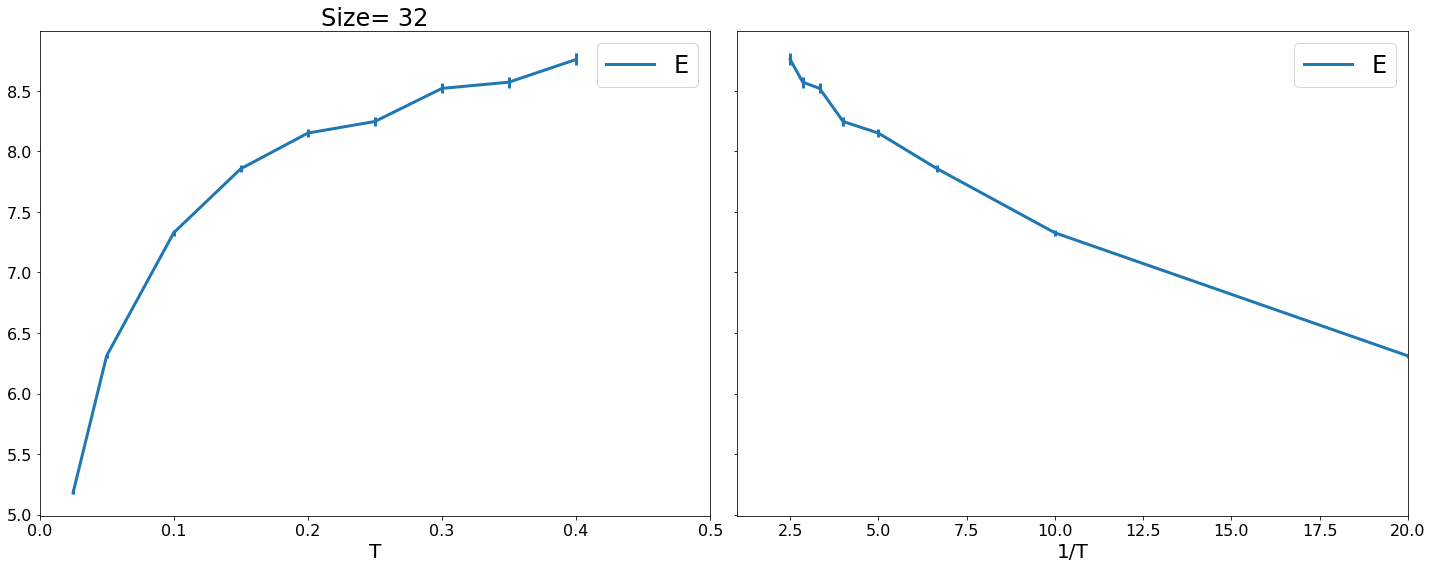

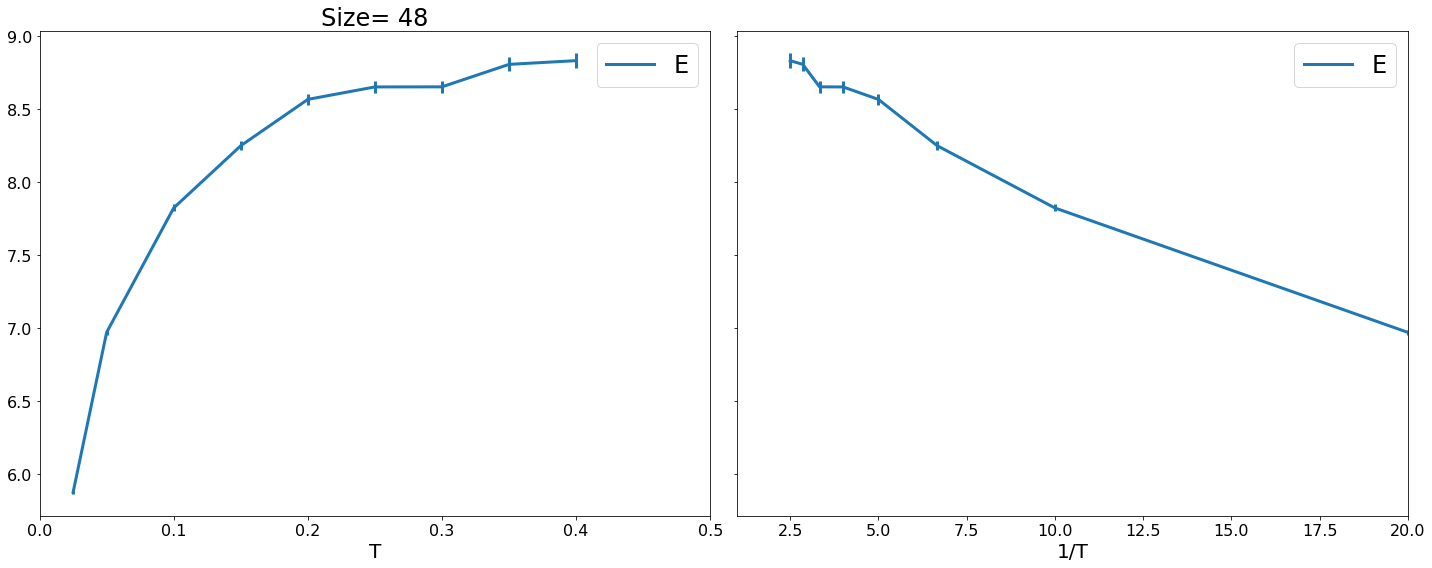

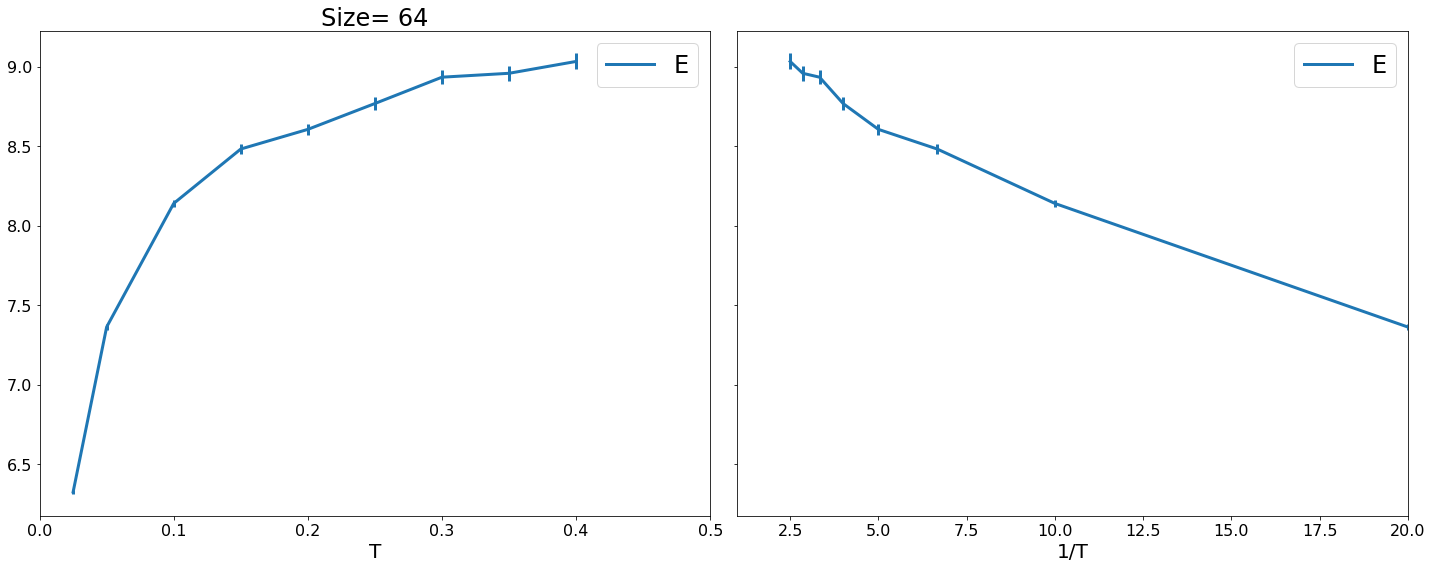

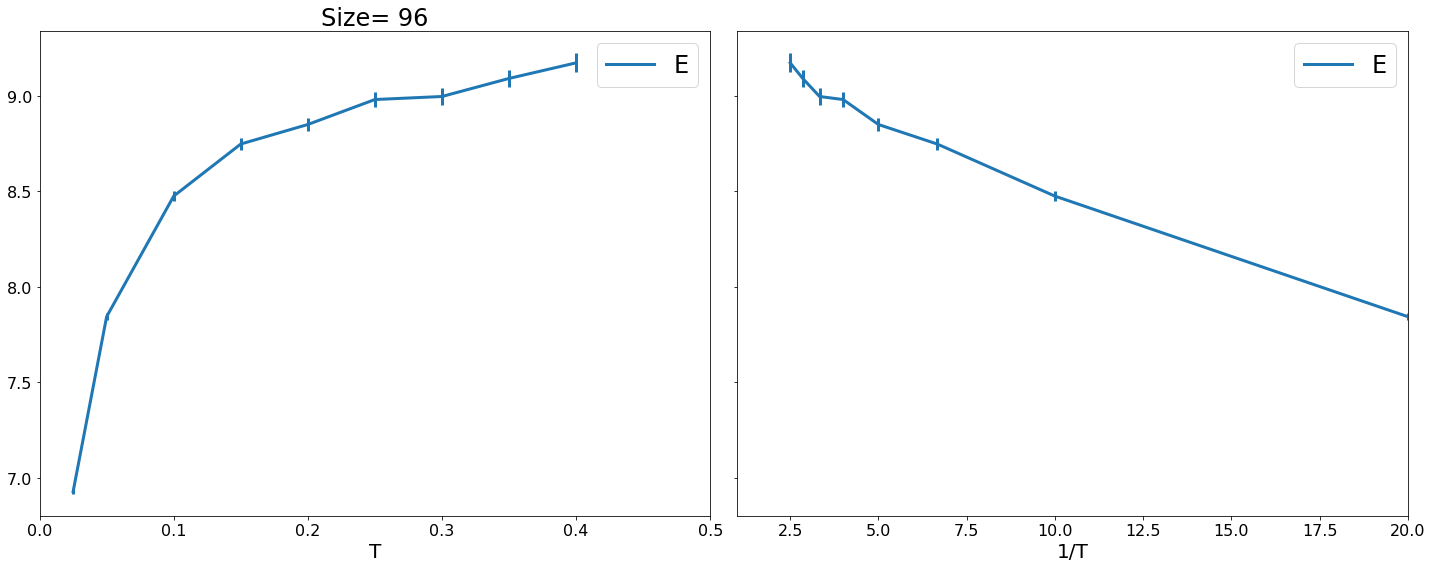

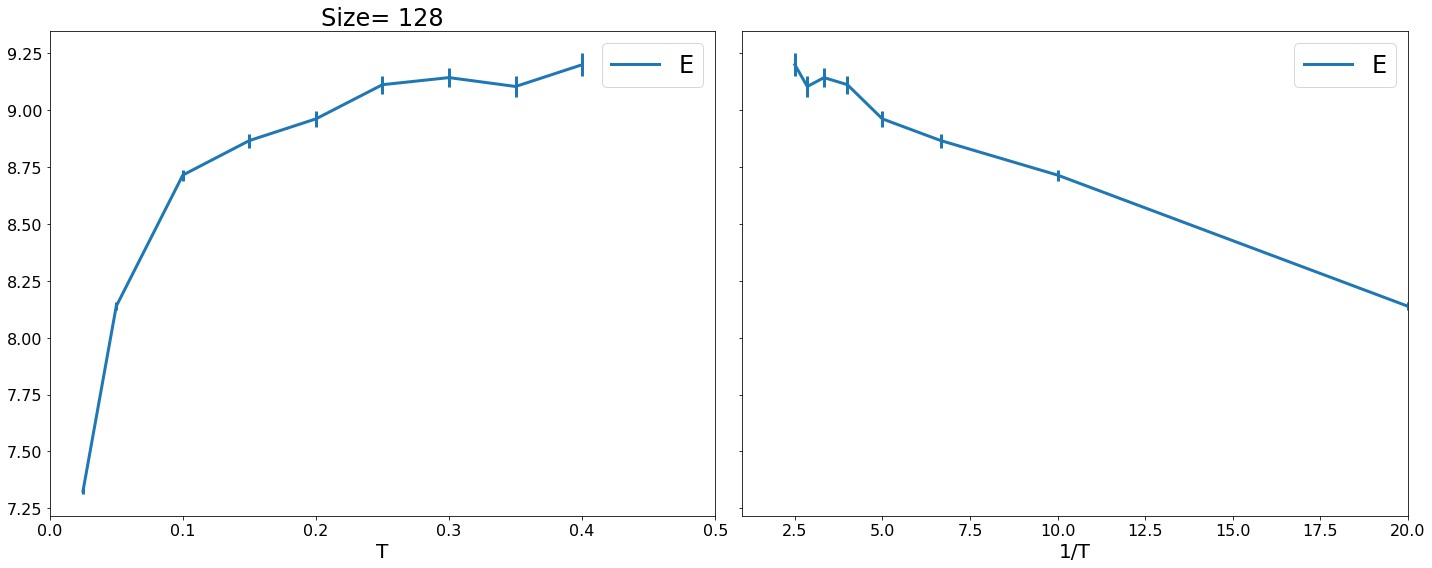

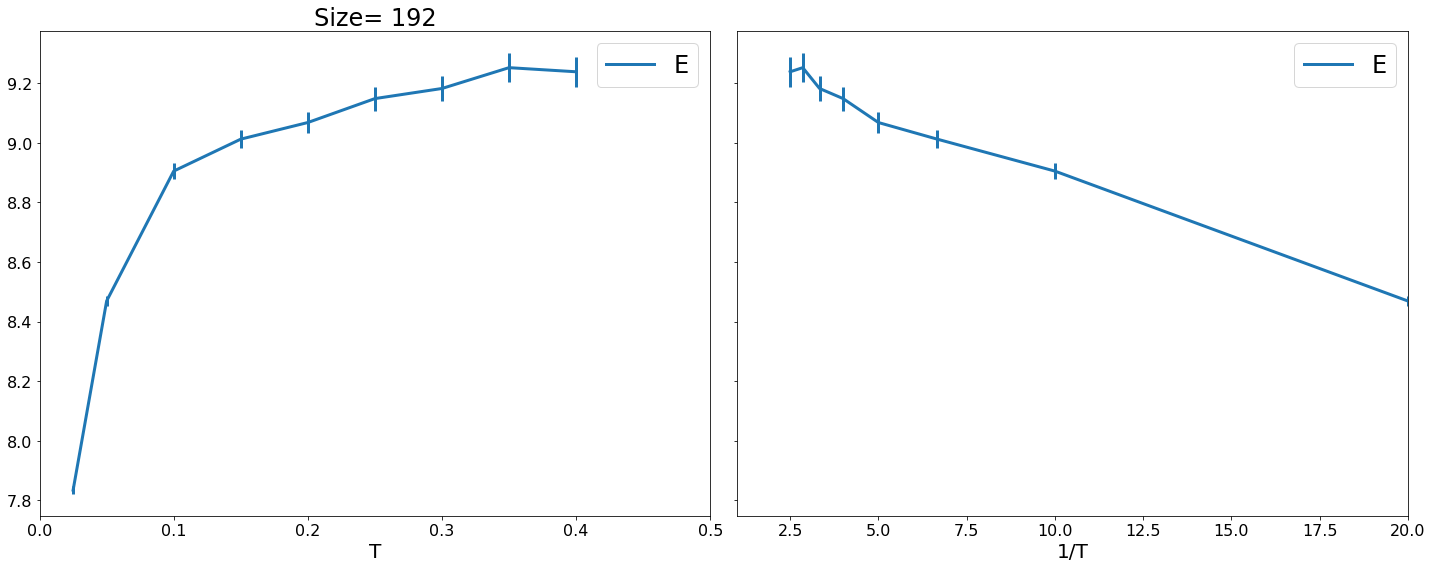

In [12]:
for g in sizes.groups:
    df = sizes.get_group(g)
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,8))
    df.plot(x="T", y="E", yerr="err", xlim=[0,0.5], ax=ax[0]);
    df.plot(x="1/T", y="E", yerr="err", xlim=[1,20], ax=ax[1]);
    ax[0].set_title(f"Size= {g}");

## Combine L and T

<AxesSubplot:xlabel='1/LT'>

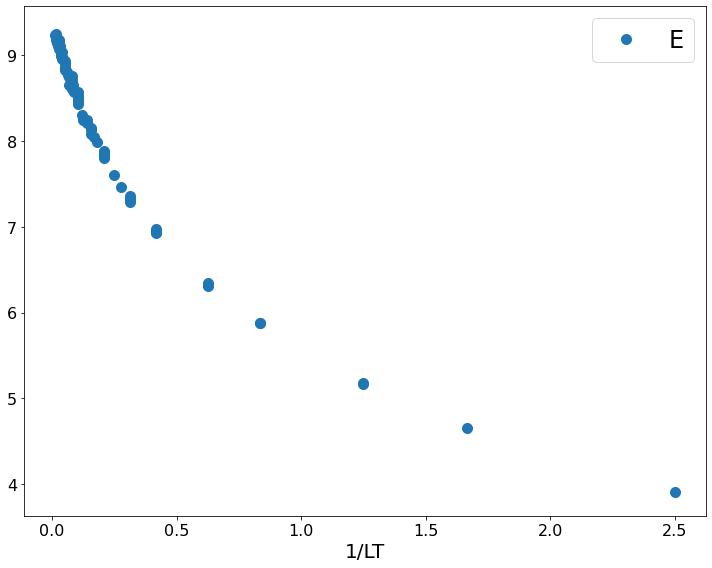

In [13]:
data.plot(x="1/LT", y="E", yerr="err", fmt="o")

### Plot all points

In [2]:
run = "bmn2_su2_g05"
dl_val = 3.302 #8.824 #9.432 #10.426 
ht_val = 3.297
data = pd.read_csv(f"../../lattice/improv_runs/{run}/e.csv")

data["1/L"]= 1./data["L"]
data["1/T"]= 1./data["T"]
data["1/LT"]= 1./(data["T"]*data["L"])

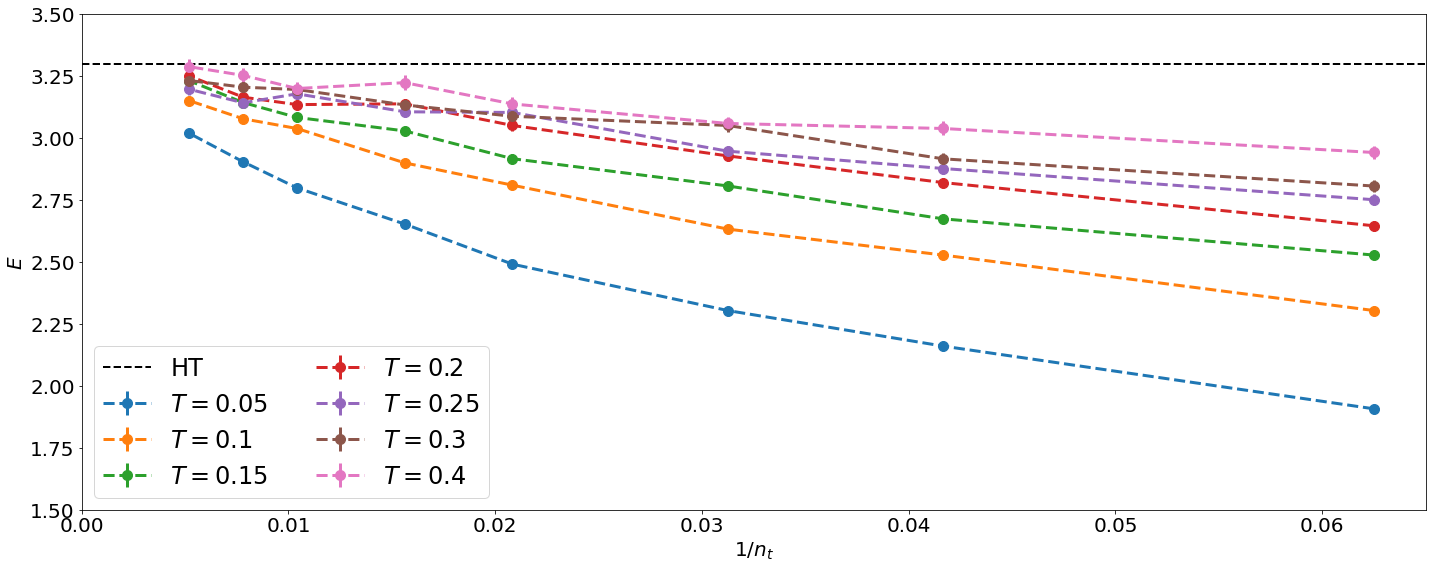

In [3]:
temps = data.groupby("T")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
for g in temps.groups:
    df = temps.get_group(g)
    df.plot(x="1/L", y="E", yerr="err", fmt="--o", label=r"$T=$"+f"{g}", ax=ax)
# ax.axhline(dl_val,color="k", ls="--", lw="2", label="DL")
ax.axhline(ht_val,color="k", ls="--", lw="2", label="HT")
# ax.set_title(r"SU(3) $\lambda=2.0$")
ax.set_ylim([1.5,3.5])
ax.set_xlim([0,0.065])
ax.set_ylabel(r"$E$")
ax.set_xlabel(r"$1/n_t$")
ax.legend(loc="lower left", ncol=2)
plt.savefig(f"../figures/{run}_e_LT.pdf");

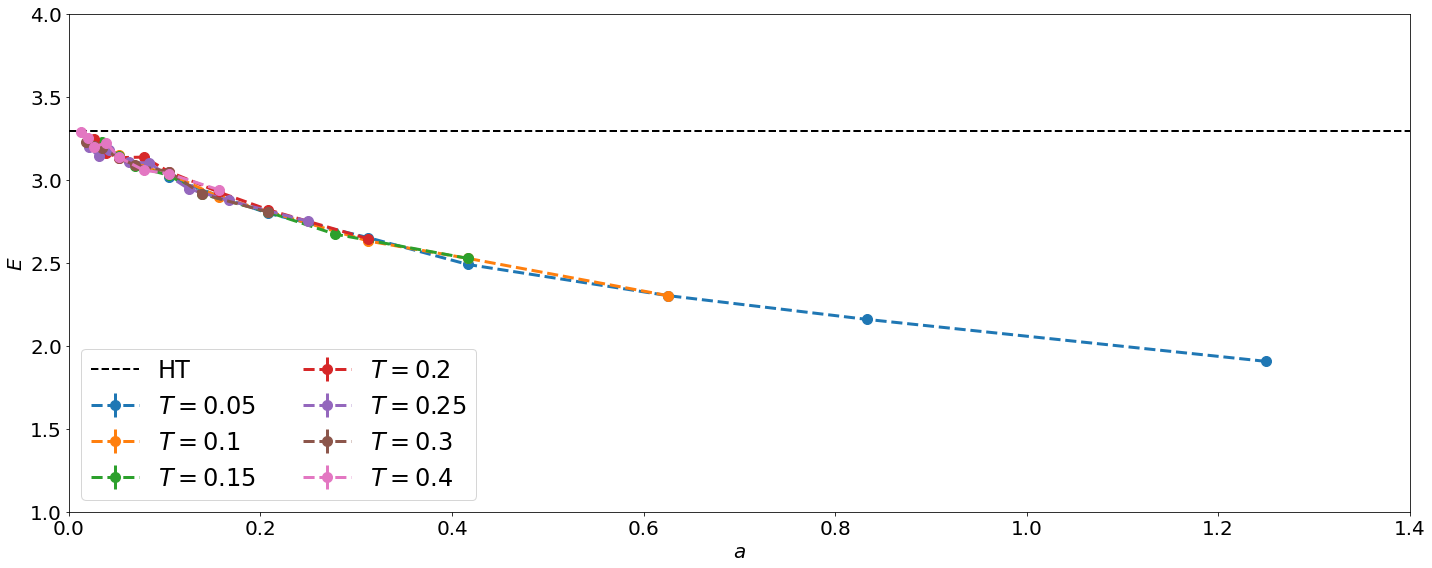

In [4]:
temps = data.groupby("T")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
for g in temps.groups:
    df = temps.get_group(g)
    df.plot(x="1/LT", y="E", yerr="err", fmt="--o", label=r"$T=$"+f"{g}", ax=ax)
# ax.axhline(dl_val,color="k", ls="--", lw="2", label="DL")
ax.axhline(ht_val,color="k", ls="--", lw="2", label="HT")
ax.set_ylim([1,4])
ax.set_xlim([0,1.4])
ax.set_ylabel(r"$E$")
ax.set_xlabel(r"$a$")
ax.legend(loc="lower left", ncol=2)
plt.savefig(f"../figures/{run}_e_a.pdf");

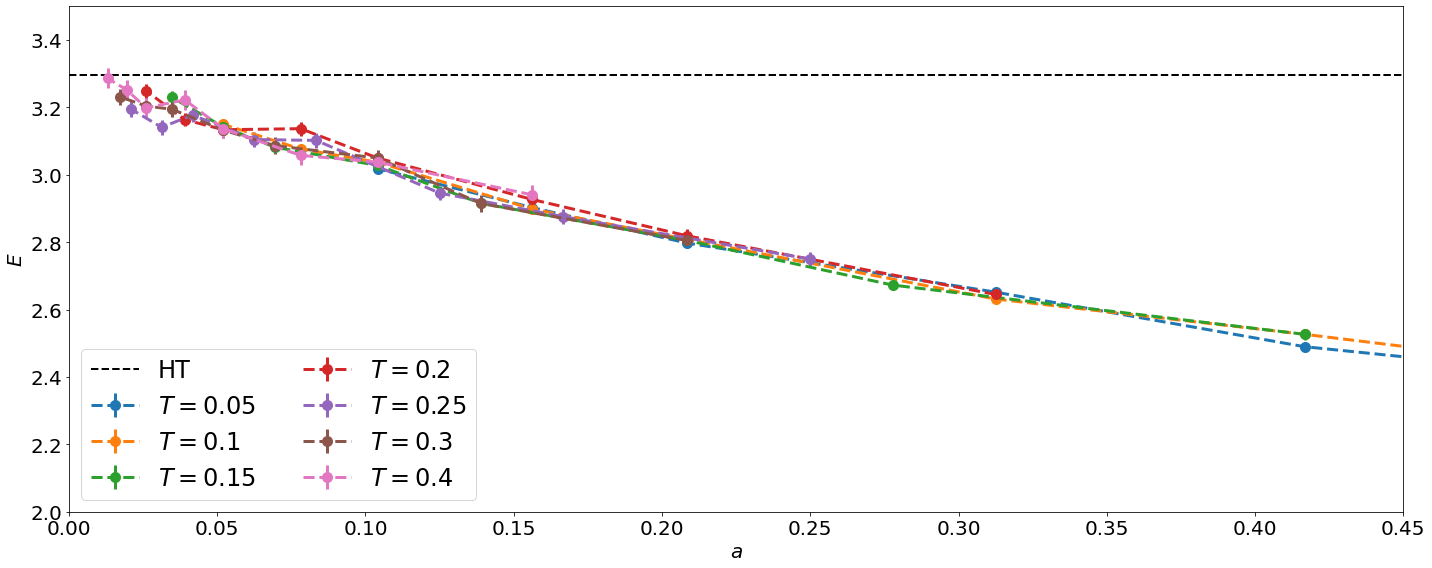

In [5]:
## zoom in low 1/LT
temps = data.groupby("T")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
for g in temps.groups:
    df = temps.get_group(g)
    df.plot(x="1/LT", y="E", yerr="err", fmt="--o", label=r"$T=$"+f"{g}", ax=ax)
# ax.axhline(dl_val,color="k", ls="--", lw="2", label="DL")
ax.axhline(ht_val,color="k", ls="--", lw="2", label="HT")

ax.set_ylim([2,3.5])
ax.set_xlim([0,0.45])
ax.set_ylabel(r"$E$")
ax.set_xlabel(r"$a$")
ax.legend(loc="lower left", ncol=2)
plt.savefig(f"../figures/{run}_e_a_zoom.pdf");

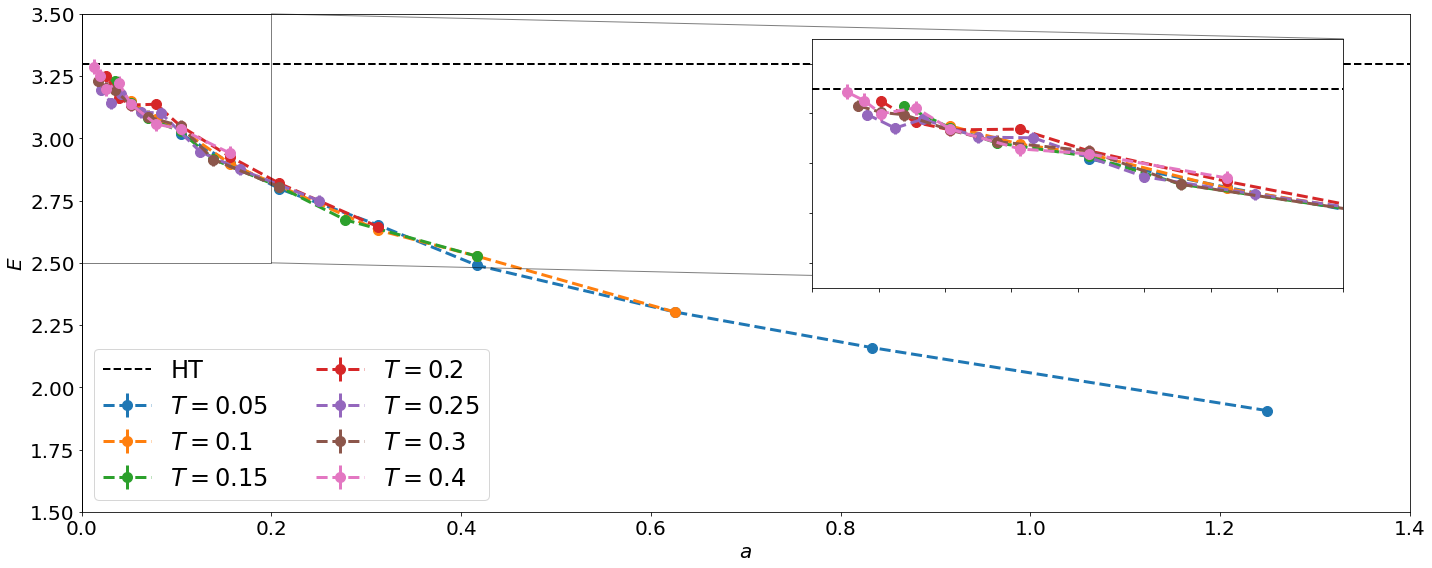

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))

# make data
for g in temps.groups:
    df = temps.get_group(g)
    df.plot(x="1/LT", y="E", yerr="err", fmt="--o", label=r"$T=$"+f"{g}", ax=ax)
# ax.axhline(dl_val,color="k", ls="--", lw="2", label="DL")
ax.axhline(ht_val,color="k", ls="--", lw="2", label="HT")
ax.axvline(0,color="k", ls="-", lw="1")

# inset axes.... bounds are [x0, y0, width, height] for where to put it
axins = ax.inset_axes([0.55, 0.45, 0.4, 0.5])

for g in temps.groups:
    df = temps.get_group(g)
    df.plot(x="1/LT", y="E", yerr="err", legend=False, fmt="--o", ax=axins)
# axins.axhline(dl_val,color="k", ls="--", lw="2", label="DL")
axins.axhline(ht_val,color="k", ls="--", lw="2", label="HT")
# sub region of the original image
x1, x2, y1, y2 = 0, 0.2, 2.5, 3.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_ylabel('')
axins.set_xlabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_ylim([1.5,3.5])
ax.set_xlim([0,1.4])
ax.set_ylabel(r"$E$")
ax.set_xlabel(r"$a$")
ax.legend(loc="lower left", ncol=2)
plt.savefig(f"../figures/{run}_e_a_zoom.pdf")
plt.savefig(f"../figures/{run}_e_a_zoom.png")
plt.savefig(f"../figures/{run}_e_a_zoom.svg");

## Fit a model to data

use a quadratic model at small $1/LT$ (for SU(2) there is a clear curvature...)

$$
\ln\,p(y\,|\,x,\sigma,m,b,f) =
-\frac{1}{2} \sum_n \left[
    \frac{(y_n-m\,x_n^2-b\,x_n-f)^2}{s_n^2}
\right]
$$

where

$$
s_n^2 = \sigma_n^2 \quad .
$$

### Continuum fit assuming gaussian errors using `lsqfit`

Fit with $a/(TL)^2 + b/(TL) + E$ using the entire dataset (maybe filter some large lattice spacings) and also try polynomials of different order

In [20]:
import lsqfit as ls
import gvar as gv

def make_data(data, cut=0.45):
    df = data.query("`1/LT` < @cut") #.drop_duplicates(subset="1/LT")
    x = df["1/LT"].values
    y = df["E"].values
    yerr = df["err"].values
    return x, gv.gvar(y,yerr)

datagv = make_data(data,cut=0.45)


In [21]:
datagv[0],datagv[1]

(array([0.15625   , 0.20833333, 0.25      , 0.3125    , 0.41666667,
        0.10416667, 0.13888889, 0.16666667, 0.20833333, 0.27777778,
        0.41666667, 0.078125  , 0.10416667, 0.125     , 0.15625   ,
        0.20833333, 0.3125    , 0.05208333, 0.06944444, 0.08333333,
        0.10416667, 0.13888889, 0.20833333, 0.41666667, 0.0390625 ,
        0.05208333, 0.0625    , 0.078125  , 0.10416667, 0.15625   ,
        0.3125    , 0.02604167, 0.03472222, 0.04166667, 0.05208333,
        0.06944444, 0.10416667, 0.20833333, 0.01953125, 0.02604167,
        0.03125   , 0.0390625 , 0.05208333, 0.078125  , 0.15625   ,
        0.01302083, 0.01736111, 0.02083333, 0.02604167, 0.03472222,
        0.05208333, 0.10416667]),
 array([2.941(28), 2.805(24), 2.750(21), 2.645(19), 2.527(16), 3.038(28),
        2.915(24), 2.876(22), 2.819(20), 2.673(16), 2.527(14), 3.058(27),
        3.050(24), 2.946(22), 2.927(19), 2.806(17), 2.631(13), 3.137(28),
        3.087(25), 3.102(23), 3.050(20), 2.916(17), 2.809(14), 2

In [22]:
# fit functions
def fcn(x, p): # order determined by size of p[a]
    c = p['a']  # array of coefficients for the polynomial of x
    E = p['E']  # bias, term at x=0
    return np.dot(np.vander(x, len(c)+1)[:,:-1], c) + E

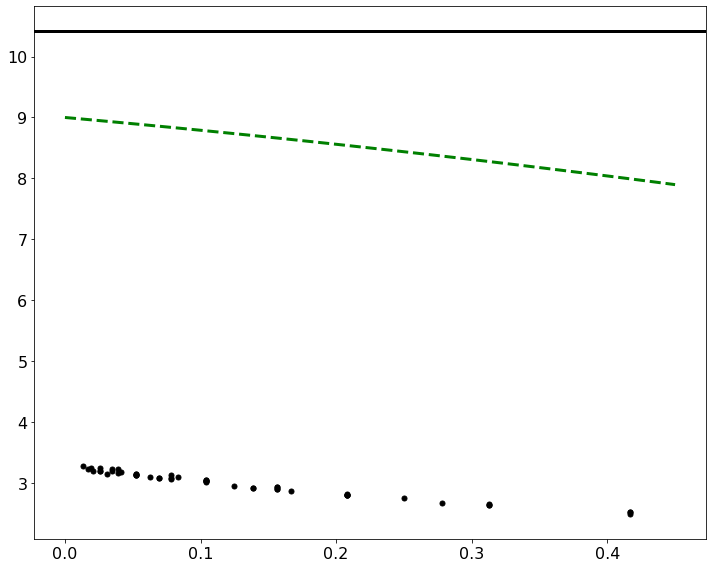

In [23]:
p = gv.BufferDict()
p['a'] = [-1, -2]
p['E'] = 9

plt.errorbar(datagv[0], gv.mean(datagv[1]), yerr=gv.sdev(datagv[1]), fmt=".k", capsize=0)
plt.axhline(10.426,color="k", ls="-")
x0 = np.linspace(0, 0.45, 100)
plt.plot(x0, fcn(x0,p), "--g")

In [24]:
# prior
def make_prior(order):
    prior = gv.BufferDict()         # any dictionary works
    prior['a'] = [gv.gvar(0, 100) for i in range(order)]
    prior['E'] = gv.gvar(9,9)  # this is the free theory energy
    return prior

In [25]:
make_prior(2)

BufferDict([('a', array([0(100), 0(100)], dtype=object)), ('E', 9.0(9.0))])

In [26]:
# fit 
# order of polynomial
po = 2
cut = 0.45

def make_fit(po,cut):
    prior = make_prior(po)
    datagv = make_data(data,cut)
    fit = ls.nonlinear_fit(data=datagv, fcn=fcn, prior=prior)
    print(fit)
    return fit

In [27]:
results = []
for cut in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
    for po in [1, 2, 3]:
        print(f'************************************* cut= {cut} order = {po}')
        fit = make_fit(po,cut)
        results.append([cut,po,fit.p['E'],fit.chi2 / fit.dof])

************************************* cut= 0.05 order = 1
Least Square Fit:
  chi2/dof [dof] = 1.7 [13]    Q = 0.047    logGBF = 13.274

Parameters:
            a 0   -2.49 (77)     [    0 (100) ]  
              E   3.281 (24)     [  9.0 (9.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf

************************************* cut= 0.05 order = 2
Least Square Fit:
  chi2/dof [dof] = 1.7 [13]    Q = 0.054    logGBF = 13.163

Parameters:
            a 0      49 (71)     [    0 (100) ]  
              1   -5.3 (4.1)     [    0 (100) ]  
              E   3.317 (57)     [  9.0 (9.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf

************************************* cut= 0.05 order = 3
Least Square Fit:
  chi2/dof [dof] = 1.7 [13]    Q = 0.054    logGBF = 13.161

Parameters:
            a 0      3 (100)     [   

In [43]:
from tabulate import tabulate
print(tabulate(results,headers=["$a_{\\rm max}$", "$N$", "E", "$\chi^2$/dof"],floatfmt=".2f",tablefmt="latex_raw",))

\begin{tabular}{rrrlr}
\hline
      &   $a_{\rm max}$ &   $N$ & E         &   $\chi^2$/dof \\
\hline
 0.05 &              16 &     2 & 3.219(13) &           1.54 \\
 0.10 &              16 &     2 & 3.294(18) &           0.33 \\
 0.15 &              16 &     2 & 3.315(23) &           0.99 \\
 0.20 &              16 &     2 & 3.274(27) &           1.21 \\
 0.25 &              16 &     2 & 3.221(29) &           1.05 \\
 0.30 &              16 &     2 & 3.263(31) &           0.41 \\
 0.40 &              16 &     2 & 3.338(38) &           0.52 \\
\hline
\end{tabular}


In [29]:
df = pd.DataFrame(results, columns=["cut","N","E","rchisq"])
df.sample(3)

,cut,N,E,rchisq
11,0.3,3,3.285(14),1.154226
5,0.1,3,3.311(27),1.387692
12,0.4,1,3.2416(46),2.319240


In [30]:
df.query("N==2")

,cut,N,E,rchisq
1,0.05,2,3.317(57),1.698450
4,0.10,2,3.312(26),1.389375
7,0.20,2,3.280(12),1.285813
10,0.30,2,3.2841(88),1.154433
13,0.40,2,3.2878(76),1.131556
16,0.50,2,3.2823(65),1.238935


Plot the results from systematic fits.

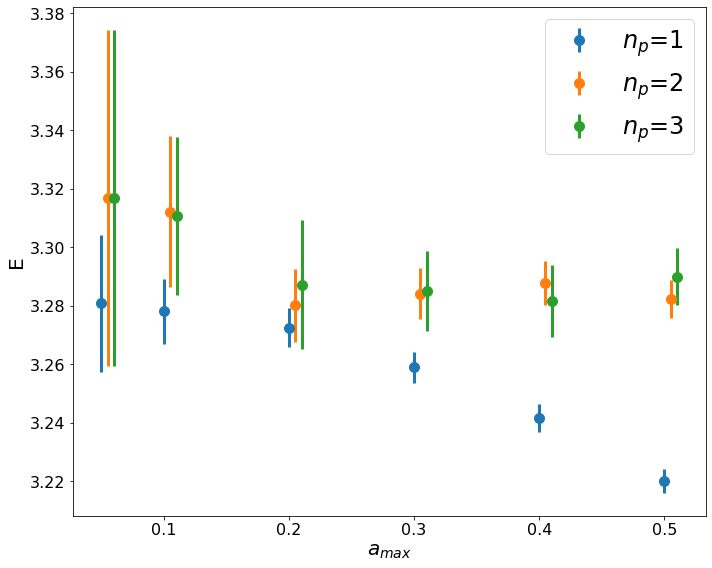

In [31]:
for i,o in enumerate(df.N.unique()):
    # filter data
    dff = df.query("N==@o")
    #plot
    plt.errorbar(dff.cut+i/200,gv.mean(dff.E.values),gv.sdev(dff.E.values),fmt="o",label=r"$n_p$"+f"={o}")
plt.xlabel(r"$a_{max}$")
plt.ylabel("E")
plt.legend(loc="best");

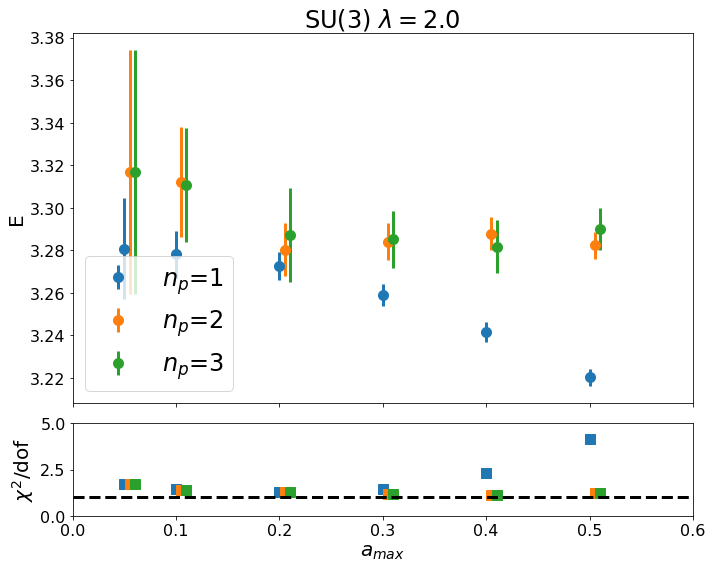

In [32]:
# start plotting
fig, (ax1,ax2) = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios':[4, 1]})
fig.subplots_adjust(hspace=0)
ax2.set_xlim(0.0,0.6)
#    ax1.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=8))
ax2.set_ylim(0,5)

for i,o in enumerate(df.N.unique()):
    # filter data
    dff = df.query("N==@o")
    #plot
    ax1.errorbar(dff.cut+i/200,gv.mean(dff.E.values),gv.sdev(dff.E.values),fmt="o",label=r"$n_p$"+f"={o}")
    ax2.plot(dff.cut+i/200,dff.rchisq,linestyle='none',marker='s')

ax2.axhline(1.,color='black', linestyle='--')
ax1.set_ylabel('E')
ax2.set_ylabel(r'$\chi^{2}$/dof')
ax2.set_xlabel(r'$a_{max}$')
ax1.set_title(r"SU(3) $\lambda=2.0$")
ax1.legend(loc='lower left');

### Continuum fit assuming gaussian errors using `numpy`

Fit with $a/L^2 + b/L + c$ at each temperature $T$

In [31]:
df = data.query("T == 0.4")
x = df["1/L"].values
y = df["E"].values
yerr = df["err"].values
print(x,y,yerr)

[0.0625     0.04166667 0.03125    0.02083333 0.015625   0.01041667
 0.0078125  0.00520833] [ 8.8283  9.1856  9.3927  9.6276  9.8255  9.88    9.92   10.1236] [0.0538 0.0543 0.0537 0.0539 0.0554 0.0543 0.0536 0.055 ]


In [32]:
param_dim = 3  ## this is the dimension of the parameter space

In [33]:
# just least squares
# covariance matrix is diagonal
C = np.diag(yerr * yerr)
# build 1/L^2 1/L^1 and 1/L^0 in one line
A = np.vander(x, param_dim)
# solve the LS master equation
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
# error on parameters
cov = np.linalg.inv(ATA)
# parameters
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
# show results
print("Least-squares estimates:")
for i in np.arange(0,param_dim):
    print(f"param[{i}] = {w[i]:.3f} ± {np.sqrt(cov[i,i]):.3f}")

Least-squares estimates:
param[0] = 129.631 ± 61.986
param[1] = -30.237 ± 4.200
param[2] = 10.214 ± 0.052


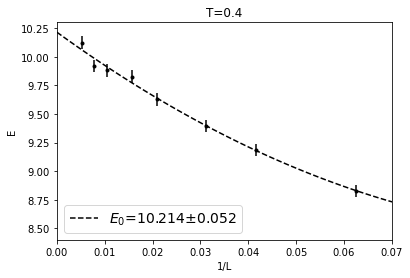

In [35]:
## plot
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0,0.1,100)
plt.plot(x0, np.dot(np.vander(x0, param_dim), w), "--k", label=fr"$E_{0}$={w[-1]:.3f}±{np.sqrt(cov[-1, -1]):.3f}")
plt.legend(loc="lower left", fontsize=14)
plt.xlim(0, 0.07)
plt.title("T=0.4")
plt.xlabel("1/L")
plt.ylabel("E");

Loop over temperatures and fit

In [36]:
# choose quadratic (3) or linear (2) fit in 1/L
param_dim = 3
temps = data.groupby("T")


Least-squares estimates for T=0.05:
param[0] = 917.490 ± 19.100
param[1] = -125.319 ± 1.326
param[2] = 9.596 ± 0.017


<ErrorbarContainer object of 3 artists>

(0.0, 0.07)

Text(0.5, 0, '1/L')

Text(0, 0.5, 'E')

Text(0.5, 1.0, 'Temperature = 0.05')

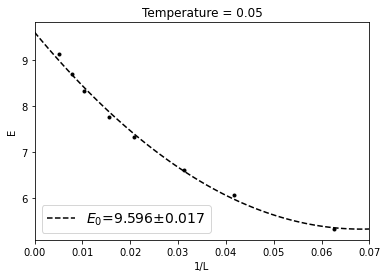

Least-squares estimates for T=0.1:
param[0] = 585.936 ± 28.736
param[1] = -90.609 ± 1.974
param[2] = 10.017 ± 0.025


<ErrorbarContainer object of 3 artists>

(0.0, 0.07)

Text(0.5, 0, '1/L')

Text(0, 0.5, 'E')

Text(0.5, 1.0, 'Temperature = 0.1')

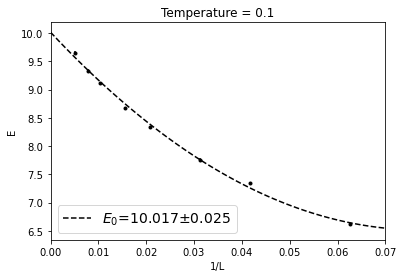

Least-squares estimates for T=0.15:
param[0] = 456.836 ± 36.022
param[1] = -74.234 ± 2.483
param[2] = 10.185 ± 0.032


<ErrorbarContainer object of 3 artists>

(0.0, 0.07)

Text(0.5, 0, '1/L')

Text(0, 0.5, 'E')

Text(0.5, 1.0, 'Temperature = 0.15')

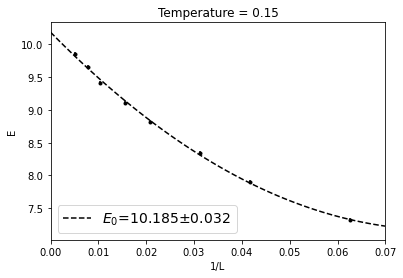

Least-squares estimates for T=0.2:
param[0] = 286.948 ± 42.826
param[1] = -56.625 ± 2.953
param[2] = 10.195 ± 0.037


<ErrorbarContainer object of 3 artists>

(0.0, 0.07)

Text(0.5, 0, '1/L')

Text(0, 0.5, 'E')

Text(0.5, 1.0, 'Temperature = 0.2')

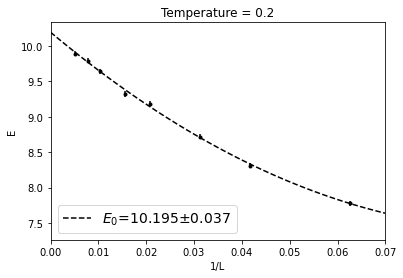

Least-squares estimates for T=0.25:
param[0] = 203.941 ± 47.477
param[1] = -46.151 ± 3.238
param[2] = 10.191 ± 0.041


<ErrorbarContainer object of 3 artists>

(0.0, 0.07)

Text(0.5, 0, '1/L')

Text(0, 0.5, 'E')

Text(0.5, 1.0, 'Temperature = 0.25')

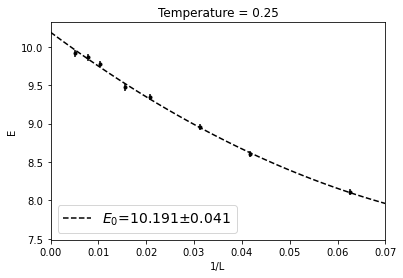

Least-squares estimates for T=0.3:
param[0] = 140.790 ± 52.799
param[1] = -40.183 ± 3.610
param[2] = 10.257 ± 0.045


<ErrorbarContainer object of 3 artists>

(0.0, 0.07)

Text(0.5, 0, '1/L')

Text(0, 0.5, 'E')

Text(0.5, 1.0, 'Temperature = 0.3')

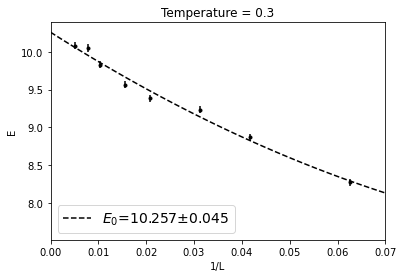

Least-squares estimates for T=0.4:
param[0] = 129.631 ± 61.986
param[1] = -30.237 ± 4.200
param[2] = 10.214 ± 0.052


<ErrorbarContainer object of 3 artists>

(0.0, 0.07)

Text(0.5, 0, '1/L')

Text(0, 0.5, 'E')

Text(0.5, 1.0, 'Temperature = 0.4')

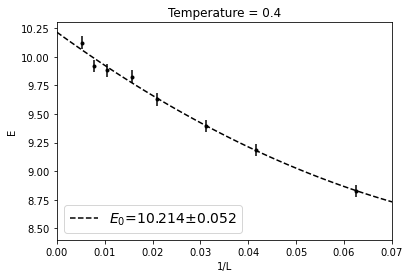

In [37]:
for g in temps.groups:
    df = temps.get_group(g)
    # data for fit
    x = df["1/L"].values
    y = df["E"].values
    yerr = df["err"].values
    # fit least squares
    C = np.diag(yerr * yerr)
    A = np.vander(x, param_dim)
    # solve the LS master equation
    ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
    cov = np.linalg.inv(ATA)
    w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
    # print results
    print(f"Least-squares estimates for T={g}:")
    for i in np.arange(0,param_dim):
        print(f"param[{i}] = {w[i]:.3f} ± {np.sqrt(cov[i,i]):.3f}")
    # plot
    plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
    x0 = np.linspace(0,0.1,100)
    plt.plot(x0, np.dot(np.vander(x0, param_dim), w), "--k", label=fr"$E_{0}$={w[-1]:.3f}±{np.sqrt(cov[-1, -1]):.3f}")
    plt.legend(loc="lower left", fontsize=14)
    plt.xlim(0, 0.07)
    plt.ylim()
    plt.xlabel("1/L")
    plt.ylabel("E",rot=90)
    plt.title(f"Temperature = {g}")
    plt.show()
    # print(f"{g},{w[-1]:.3f},{np.sqrt(cov[-1, -1]):.3f}")

### Use `gvar` and `lsqfit`

In [35]:
def make_data_eachT(data, Lcut=16):
    df = data.query("L > @Lcut") # only sizes larger than Lcut
    x = df["1/L"].values
    y = df["E"].values
    yerr = df["err"].values
    return x, gv.gvar(y,yerr)

datagv = make_data_eachT(data.query("T == 0.30"),Lcut=16)
datagv

(array([0.04166667, 0.03125   , 0.02083333, 0.015625  , 0.01041667,
        0.0078125 , 0.00520833]),
 array([2.915(24), 3.050(24), 3.087(25), 3.133(24), 3.195(24), 3.204(24),
        3.231(23)], dtype=object))

In [36]:
# fit functions
def fcn(x, p): # order determined by size of p[a]
    c = p['a']  # array of coefficients for the polynomial of x
    E = p['E']  # bias, term at x=0
    return np.dot(np.vander(x, len(c)+1)[:,:-1], c) + E

In [38]:
# prior
def make_prior(order):
    prior = gv.BufferDict()         # any dictionary works
    prior['a'] = [gv.gvar(0, 1000) for i in range(order)]
    prior['E'] = gv.gvar(3,3)
    return prior

In [39]:
# fit 

def make_fit_T(df,po,cut):
    prior = make_prior(po)
    datagv = make_data_eachT(df,cut)
    fit = ls.nonlinear_fit(data=datagv, fcn=fcn, prior=prior)
    print(fit)
    return fit

In [40]:
temps = data.groupby("T")
results = []
# order of polynomial
po = 2
# cut of data
Lcut = 16
for g in temps.groups:
    df = temps.get_group(g)
    # fit
    print(f'************************************* temperature = {g}')
    fit = make_fit_T(df,po,Lcut)
    results.append([g,Lcut,po,fit.p['E'],fit.chi2 / fit.dof])


************************************* temperature = 0.05
Least Square Fit:
  chi2/dof [dof] = 1.5 [7]    Q = 0.15    logGBF = 2.3482

Parameters:
            a 0      438 (28)     [   0 (1000) ]  
              1   -43.5 (1.3)     [   0 (1000) ]  
              E    3.219 (13)     [  3.0 (3.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 4/0.0)
  fitter = scipy_least_squares    method = trf

************************************* temperature = 0.1
Least Square Fit:
  chi2/dof [dof] = 0.33 [7]    Q = 0.94    logGBF = 5.0871

Parameters:
            a 0      244 (42)     [   0 (1000) ]  
              1   -28.7 (2.0)     [   0 (1000) ]  
              E    3.294 (18)     [  3.0 (3.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf

************************************* temperature = 0.15
Least Square Fit:
  chi2/dof [dof] = 0.99 [7]    Q = 0.44    logGBF = 1.9105

P

In [41]:
results

[[0.05, 16, 2, 3.219(13), 1.5437292712620452],
 [0.1, 16, 2, 3.294(18), 0.3334957456609978],
 [0.15, 16, 2, 3.315(23), 0.990487375196756],
 [0.2, 16, 2, 3.274(27), 1.2138809694993455],
 [0.25, 16, 2, 3.221(29), 1.0511978064937537],
 [0.3, 16, 2, 3.263(31), 0.4123899246283583],
 [0.4, 16, 2, 3.338(38), 0.5160485504558957]]

In [42]:
dx = pd.DataFrame(results, columns=["temp","cut","o","E","rchisq"])
dx.sample(3)

,temp,cut,o,E,rchisq
0,0.05,16,2,3.219(13),1.543729
3,0.20,16,2,3.274(27),1.213881
1,0.10,16,2,3.294(18),0.333496


In [44]:
from tabulate import tabulate
print(tabulate(results,headers=["$T$", "$n_t^{\\rm cut}$", "$n_p$", "$E$", "$\chi^2$/dof"],floatfmt=".2f",tablefmt="latex_raw",))

\begin{tabular}{rrrlr}
\hline
   $T$ &   $n_t^{\rm cut}$ &   $n_p$ & $E$       &   $\chi^2$/dof \\
\hline
  0.05 &                16 &       2 & 3.219(13) &           1.54 \\
  0.10 &                16 &       2 & 3.294(18) &           0.33 \\
  0.15 &                16 &       2 & 3.315(23) &           0.99 \\
  0.20 &                16 &       2 & 3.274(27) &           1.21 \\
  0.25 &                16 &       2 & 3.221(29) &           1.05 \\
  0.30 &                16 &       2 & 3.263(31) &           0.41 \\
  0.40 &                16 &       2 & 3.338(38) &           0.52 \\
\hline
\end{tabular}


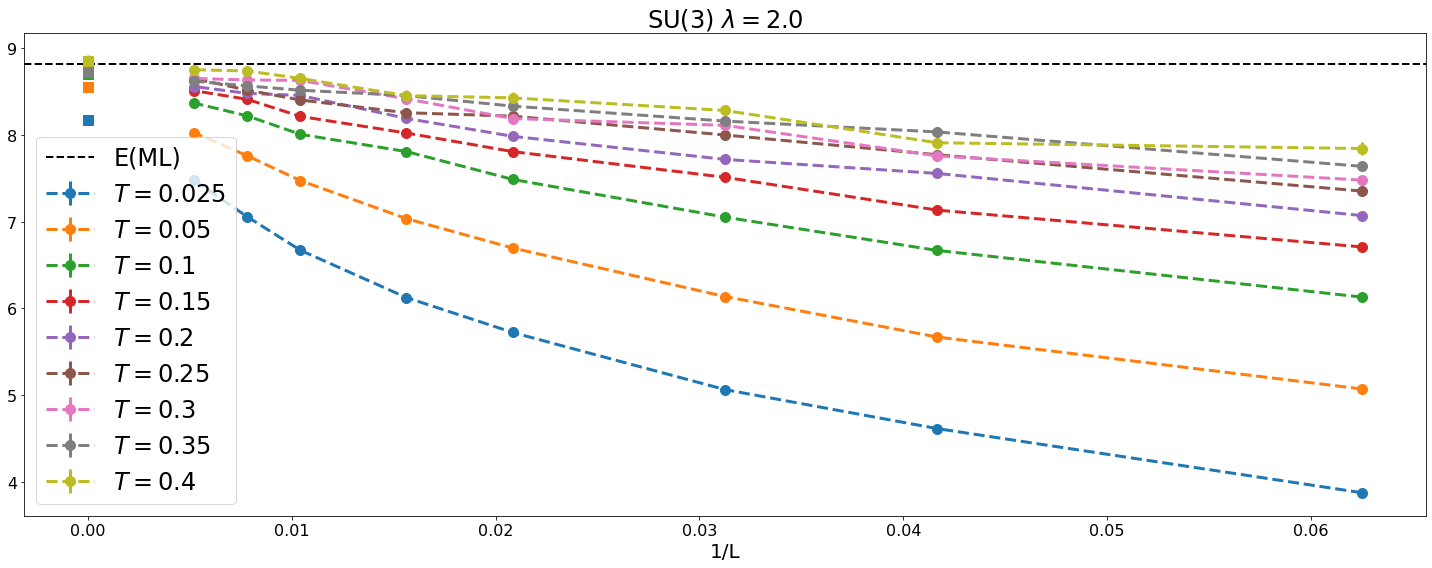

In [89]:
import matplotlib.colors as mcolors
c = mcolors.TABLEAU_COLORS
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
for i,g in zip(c,temps.groups):
    df = temps.get_group(g)
    df.plot(x="1/L", y="E", yerr="err", fmt="--o", color=i, label=r"$T=$"+f"{g}", ax=ax)
    en = dx[dx.temp==g].E.values
    plt.errorbar([0],gv.mean(en),gv.sdev(en),color=i,marker='s')
ax.axhline(dl_val,color="k", ls="--", lw="2", label="E(ML)")
ax.set_title(r"SU(3) $\lambda=2.0$")
ax.legend(loc="best");

<ErrorbarContainer object of 3 artists>

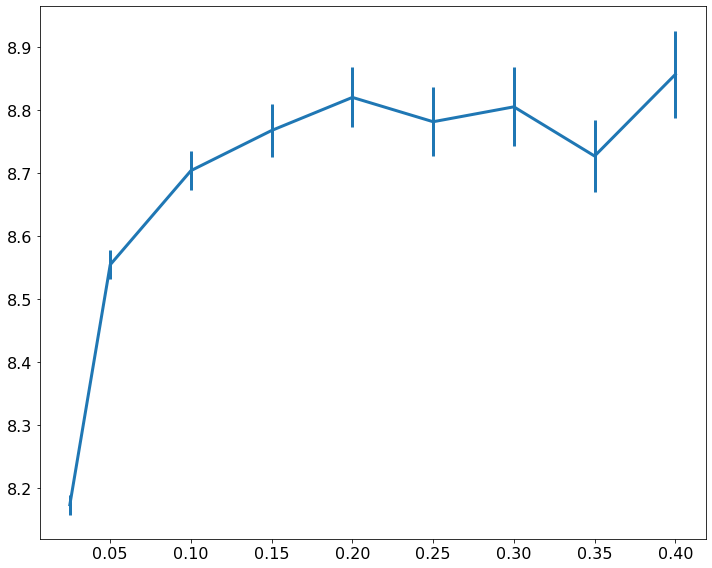

In [90]:
en = dx.E.values
te = dx.temp.values
plt.errorbar(te,gv.mean(en),gv.sdev(en))

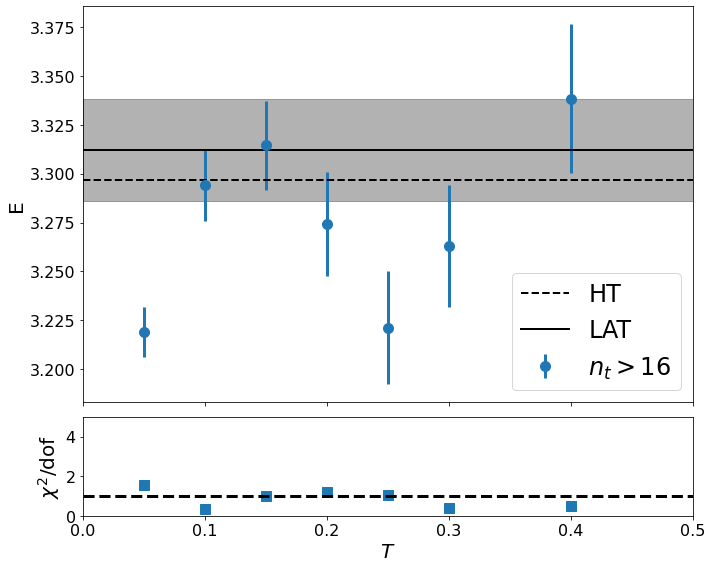

In [48]:
lat_val = 3.312
lat_err = 0.026
# start plotting
fig, (ax1,ax2) = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios':[4, 1]})
fig.subplots_adjust(hspace=0)
ax2.set_xlim(0.0,0.5)
#    ax1.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=8))
ax2.set_ylim(0,5)

en = dx.E.values
te = dx.temp.values
ch = dx.rchisq.values
ax1.errorbar(te,gv.mean(en),gv.sdev(en),fmt="o",label=r"$n_t>16$")
ax2.plot(te,ch,linestyle='none',marker='s')

ax1.axhline(ht_val,color="k", ls="--", lw="2", label="HT")
ax1.axhline(lat_val,color="k", ls="-", lw="2", label="LAT")
ax1.axhspan(lat_val+lat_err,lat_val-lat_err,color="k",alpha=0.3)
ax2.axhline(1.,color='black', linestyle='--')
ax1.set_ylabel('E')
ax2.set_ylabel(r'$\chi^{2}$/dof')
ax2.set_xlabel(r'$T$')
ax1.legend(loc='lower right')
plt.savefig(f"../figures/{run}_energy-fit_eachT.pdf")